<a href="https://colab.research.google.com/github/arnml/colabrepository/blob/main/MITx_6_419x_modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectures 1 - 3

In [ ]:
%reset -f
import scipy.special as sp
n = 31000
p = 0.00203
k = 63
P = sp.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(P)

0.05024468664277072


In [ ]:
# p-value of test statistic for Binomial(n,p)
%reset -f
from scipy.stats import binom

# Parameters
n = 31000
p = 0.00203
T = 39

# Calculate the cumulative probability P(X <= 39)
p_value = binom.cdf(T, n, p)

print(f"The p-value for x <= {T} is {p_value}")


The p-value for x <= 39 is 0.0008074555188959496


In [ ]:
# prompt: cdf for x with distribution hypergeometric(N,K,n)
%reset -f
import scipy.stats as stats

# Parameters for the hypergeometric distribution
N = 62000  # Population size
K = 31000   # Number of successes in the population
n = 102   # Number of draws

# Calculate the CDF for a specific value of x
x = 39  # Value for which to calculate the CDF
cdf_value = stats.hypergeom.cdf(x, N, K, n)

print(f"The CDF for x = {x} is: {cdf_value}")

# Example of calculating CDF for multiple x values
x_values = range(102)
cdf_values = stats.hypergeom.cdf(x_values, N, K, n)

The CDF for x = 39 is: 0.011094091841433758


In [ ]:
# prompt: cdf for x with distribution hypergeometric(N,K,n) with fisher_exact
%reset -f
import scipy.stats as stats

# Parameters for the hypergeometric distribution
N = 62000  # Population size
K = 31000   # Number of successes in the population
n = 102   # Number of draws

# Calculate the CDF for a specific value of x using stats.hypergeom.cdf
x = 39  # Value for which to calculate the CDF
cdf_value = stats.hypergeom.cdf(x, N, K, n)

print(f"The CDF for x = {x} is: {cdf_value}")

# Example of calculating CDF for multiple x values
x_values = range(n + 1)  # Iterate up to n inclusive
cdf_values = stats.hypergeom.cdf(x_values, N, K, n)

# Fisher exact test example
# Assuming you have two tables of observed and expected counts
# Replace with your actual data

# Table 1
observed_table1 = [[39, 63], [30961, 30937]]

oddsratio, pvalue = stats.fisher_exact(observed_table1, alternative='less')

print("\nFisher Exact Test Results (Table 1):")
print(f"Odds Ratio: {oddsratio}")
print(f"P-value: {pvalue}")

The CDF for x = 39 is: 0.011094091841433758

Fisher Exact Test Results (Table 1):
Odds Ratio: 0.6185677526719483
P-value: 0.011094091841433758


In [ ]:
%reset -f
from scipy.stats import norm

# Value for which we want the CDF
x = -3.0268

# Calculate the CDF
cdf_value = norm.cdf(x)

print(f"The CDF of the normal distribution at x = {x} is {cdf_value}")


The CDF of the normal distribution at x = -3.0268 is 0.0012357871459340907


In [ ]:
#t-test for pill
%reset -f
import numpy as np
from scipy.stats import t

# Data
X = np.array([0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5])

# Calculate mean and unbiased standard deviation
X_mean = np.mean(X)
unbiased_std = np.std(X, ddof=1)

# Sample size
n = len(X)

# Calculate t-statistic
t_statistic = X_mean / (unbiased_std / np.sqrt(n))

# Survival function (1 - CDF) for the t-distribution
survival_function = t.sf(t_statistic, df=n-1)

# Output results
print("T-Statistic:", t_statistic)
print("Survival Function (p-value, one-tailed):", survival_function)


T-Statistic: 3.1835383022188735
Survival Function (p-value, one-tailed): 0.005560692749284678


In [ ]:
%reset -f
import math
from scipy.stats import binom
N = 31000
yT = 39
yC = 63
pi_null_T = yT / N
pi_null_C = yC / N
pi_all = (yT + yC) / N /2
Sigma_den = binom.pmf(yT,N,pi_null_T)*binom.pmf(yC,N,pi_null_C)
Sigma_num = binom.pmf(yT,N,pi_all)*binom.pmf(yC,N,pi_all)
Sigma = -2 * math.log(Sigma_num/Sigma_den)
print(Sigma)

5.709660479762173


In [ ]:
# prompt: calculate the survival function of Sigma given a distribution chi-square of orden 1

import scipy.stats as stats

# Assuming Sigma follows a chi-square distribution with 1 degree of freedom
df = 1  # Degrees of freedom

# Calculate the survival function (1 - CDF) for Sigma
survival_function = 1 - stats.chi2.cdf(Sigma, df)

print(f"The survival function of Sigma is: {survival_function}")

The survival function of Sigma is: 0.016871802195942753


#Lecture 04

## Regression line

In [49]:
%reset -f
import numpy as np
# Distance of the galaxy from us in mega-parsecs (Mpc)
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

# Apparent velocity in km/s
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = len(Xs)

In [11]:
# prompt: get the mean of Xs and Ys

import numpy as np

Xs_mean = np.mean(Xs)
Ys_mean = np.mean(Ys)

print(f"Mean of Xs: {Xs_mean}")
print(f"Mean of Ys: {Ys_mean}")

Mean of Xs: 0.9199250000000001
Mean of Ys: 425.6175


In [12]:
# prompt: get standar deviation of Xs and Ys with loc=1

Xs_std = np.std(Xs, ddof=1)
Ys_std = np.std(Ys, ddof=1)

print(f"Standard Deviation of Xs: {Xs_std}")
print(f"Standard Deviation of Ys: {Ys_std}")

Standard Deviation of Xs: 0.6533948258734996
Standard Deviation of Ys: 348.7336574977229


In [13]:
# prompt: calculate sample unbiased covariance of Xs and Ys considering with denominatori N-1
N = len(Xs)

# Calculate the sample unbiased covariance
covariance = np.sum((Xs - np.mean(Xs)) * (Ys - np.mean(Ys))) / (N - 1)

print(f"Sample Unbiased Covariance: {covariance}")

Sample Unbiased Covariance: 191.20706528260868


In [14]:
# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(Xs, Ys)[0, 1]
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.8391399162310662


In [15]:
# Regression
beta_1 = correlation_coefficient * (np.std(Ys, ddof=1) / np.std(Xs, ddof=1))
beta_0 = np.mean(Ys) - beta_1 * np.mean(Xs)
print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

betha_0: 13.610139085217156
betha_1: 447.87059914099825


## Correcting simple nonlinear relationships

In [50]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

# semi-major axis of each planet's orbit around the Sun in units of Astronomical Units (AU).
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

# Orbital period of the planet measured in Earth years
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = len(Xs)

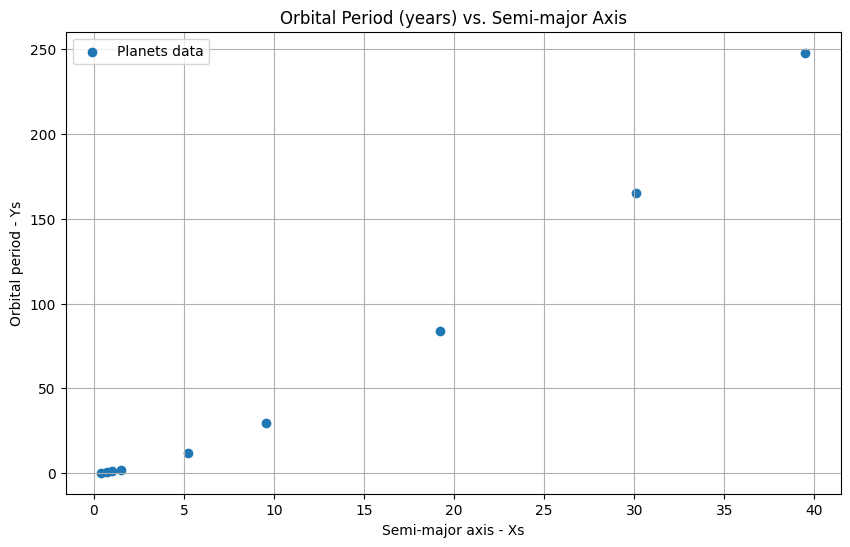

In [51]:
# prompt: plot Ys vs Xs
plt.figure(figsize=(10, 6))
plt.scatter(Xs, Ys, label='Planets data')
plt.xlabel('Semi-major axis - Xs')
plt.ylabel('Orbital period - Ys')
plt.title('Orbital Period (years) vs. Semi-major Axis')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(Xs, Ys)[0, 1]
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.9888323018726733


In [53]:
beta_1 = correlation_coefficient * (np.std(Ys, ddof=1) / np.std(Xs, ddof=1))
beta_0 = np.mean(Ys) - beta_1 * np.mean(Xs)
print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

beta_0: -12.503724461718754
beta_1: 6.108701317117373


In [54]:
Y_estimaed = beta_0 + beta_1 * Xs
residuals = Ys - Y_estimaed

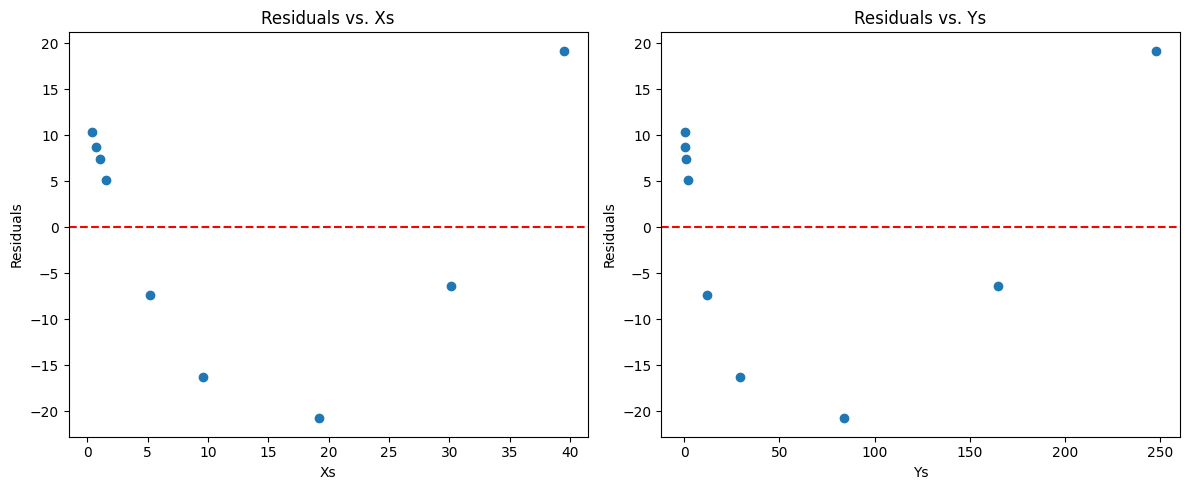

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Xs
axes[0].scatter(Xs, residuals)
axes[0].set_xlabel("Xs")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Xs")
axes[0].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Residuals vs. Ys
axes[1].scatter(Ys, residuals)
axes[1].set_xlabel("Ys")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs. Ys")
axes[1].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.tight_layout()
plt.show()

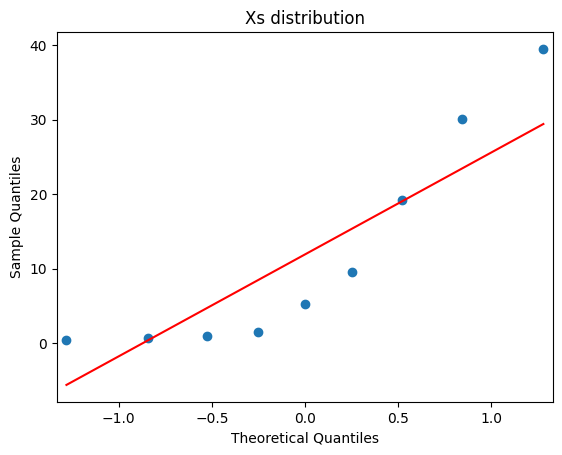

In [56]:
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("Xs distribution")
plt.show()

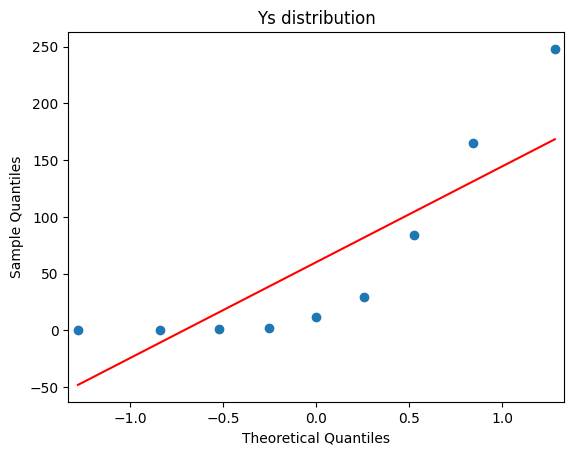

In [57]:
sm.qqplot(Ys, line='s')
plt.title("Ys distribution")
plt.show()

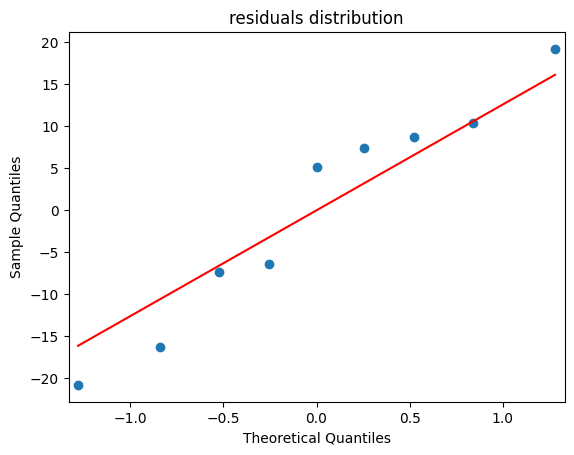

In [58]:
sm.qqplot(residuals, line='s')
plt.title("residuals distribution")
plt.show()

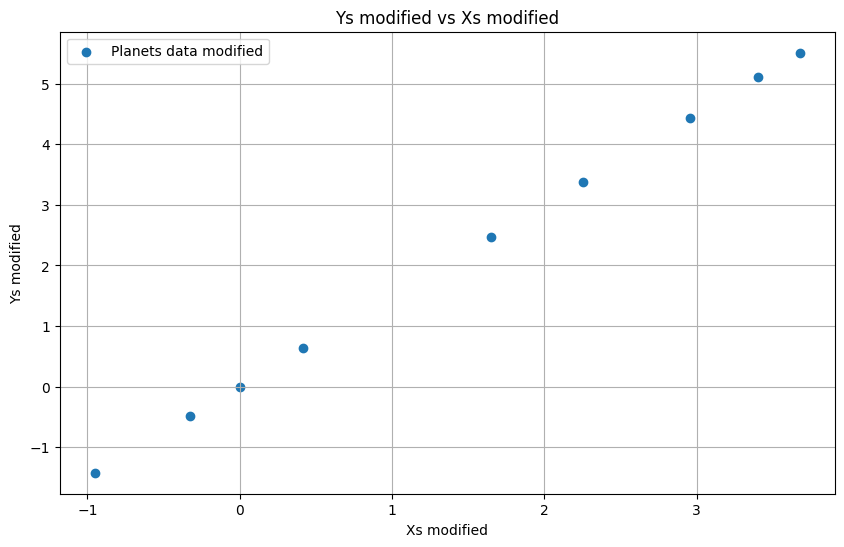

In [59]:
Xs_modified = np.log(Xs)
Ys_modified = np.log(Ys)
plt.figure(figsize=(10, 6))
plt.scatter(Xs_modified, Ys_modified, label='Planets data modified')
plt.xlabel('Xs modified')
plt.ylabel('Ys modified')
plt.title('Ys modified vs Xs modified')
plt.grid(True)
plt.legend()
plt.show()


In [60]:
r_modified = np.corrcoef(Xs_modified, Ys_modified)[0, 1]
beta_1_modified = r_modified * (np.std(Ys_modified, ddof=1) / np.std(Xs_modified, ddof=1))
beta_0_modified = np.mean(Ys_modified) - beta_1_modified * np.mean(Xs_modified)
print(f"beta_0_modified: {beta_0_modified}")
print(f"beta_1_modified: {beta_1_modified}")
Y_estimaed_modified = beta_0_modified + beta_1_modified * Xs_modified
residuals_modified = Ys_modified - Y_estimaed_modified

beta_0_modified: 0.0013370447605036695
beta_1_modified: 1.4995325773381893


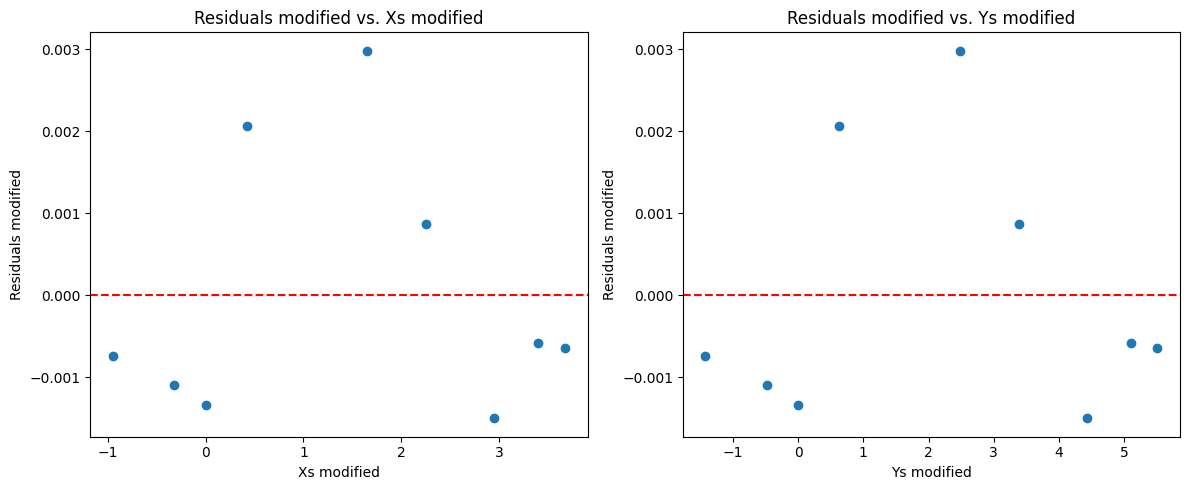

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Xs
axes[0].scatter(Xs_modified, residuals_modified)
axes[0].set_xlabel("Xs modified")
axes[0].set_ylabel("Residuals modified")
axes[0].set_title("Residuals modified vs. Xs modified")
axes[0].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Residuals vs. Ys
axes[1].scatter(Ys_modified, residuals_modified)
axes[1].set_xlabel("Ys modified")
axes[1].set_ylabel("Residuals modified")
axes[1].set_title("Residuals modified vs. Ys modified")
axes[1].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.tight_layout()
plt.show()

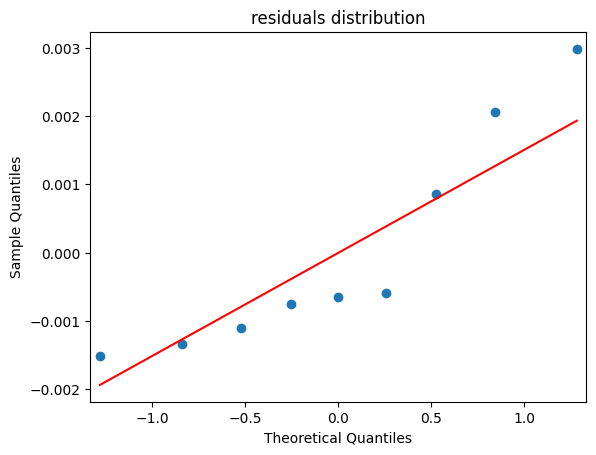

In [63]:
sm.qqplot(residuals_modified, line='s')
plt.title("residuals distribution")
plt.show()

## Exoplanet mass data - Multivariable regression

In [71]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = len(LogPlanetMass)

In [73]:
# Create the intercept array
intercept = np.ones_like(LogPlanetRadius)

# Stack all arrays horizontally (columns)
X = np.column_stack((intercept, LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))

print(X.shape)

(30, 6)


In [76]:
beta = np.linalg.inv(X.T @ X) @ X.T @ LogPlanetMass
print("beta", beta)

beta [ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]
